In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')

In [7]:
data = pd.read_csv("Mall_Customers.csv")

In [8]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data['Genre'] = pd.get_dummies(data['Genre'])
data.drop(['CustomerID'],axis=1,inplace= True)

In [11]:
data1 = pd.get_dummies(data,columns=['Genre'])
data1

,Age,Annual Income (k$),Spending Score (1-100),Genre_0,Genre_1
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,1
197,32,126,74,1,0
198,32,137,18,1,0


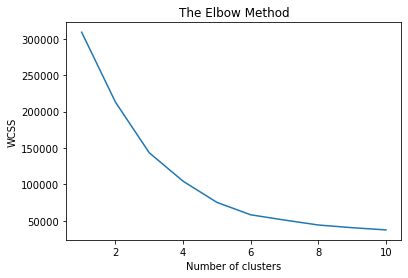

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data1)
print(y_kmeans)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [22]:
data1[y_kmeans==0]

,Age,Annual Income (k$),Spending Score (1-100),Genre_0,Genre_1
46,50,40,55,0,1
47,27,40,47,0,1
48,29,40,42,0,1
49,31,40,42,0,1
50,49,42,52,0,1
...,...,...,...,...,...
120,27,67,56,1,0
121,38,67,40,0,1
122,40,69,58,0,1
126,43,71,35,1,0


In [23]:
data1[y_kmeans==1]

,Age,Annual Income (k$),Spending Score (1-100),Genre_0,Genre_1
0,19,15,39,1,0
2,20,16,6,0,1
4,31,17,40,0,1
6,35,18,6,0,1
8,64,19,3,1,0
10,67,19,14,1,0
12,58,20,15,0,1
14,37,20,13,1,0
16,35,21,35,0,1
18,52,23,29,1,0


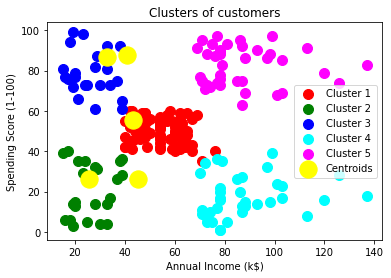

In [24]:
plt.scatter(data1[y_kmeans == 0]['Annual Income (k$)'], data1[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'r', label = 'Cluster 1')
plt.scatter(data1[y_kmeans == 1]['Annual Income (k$)'], data1[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'g', label = 'Cluster 2')
plt.scatter(data1[y_kmeans == 2]['Annual Income (k$)'], data1[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'b', label = 'Cluster 3')
plt.scatter(data1[y_kmeans == 3]['Annual Income (k$)'], data1[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data1[y_kmeans == 4]['Annual Income (k$)'], data1[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()